BOATENG RICHARD OSEI, MR. 
=

Analysis of areas in Ghana where precipitation exceeds 250 mm
=

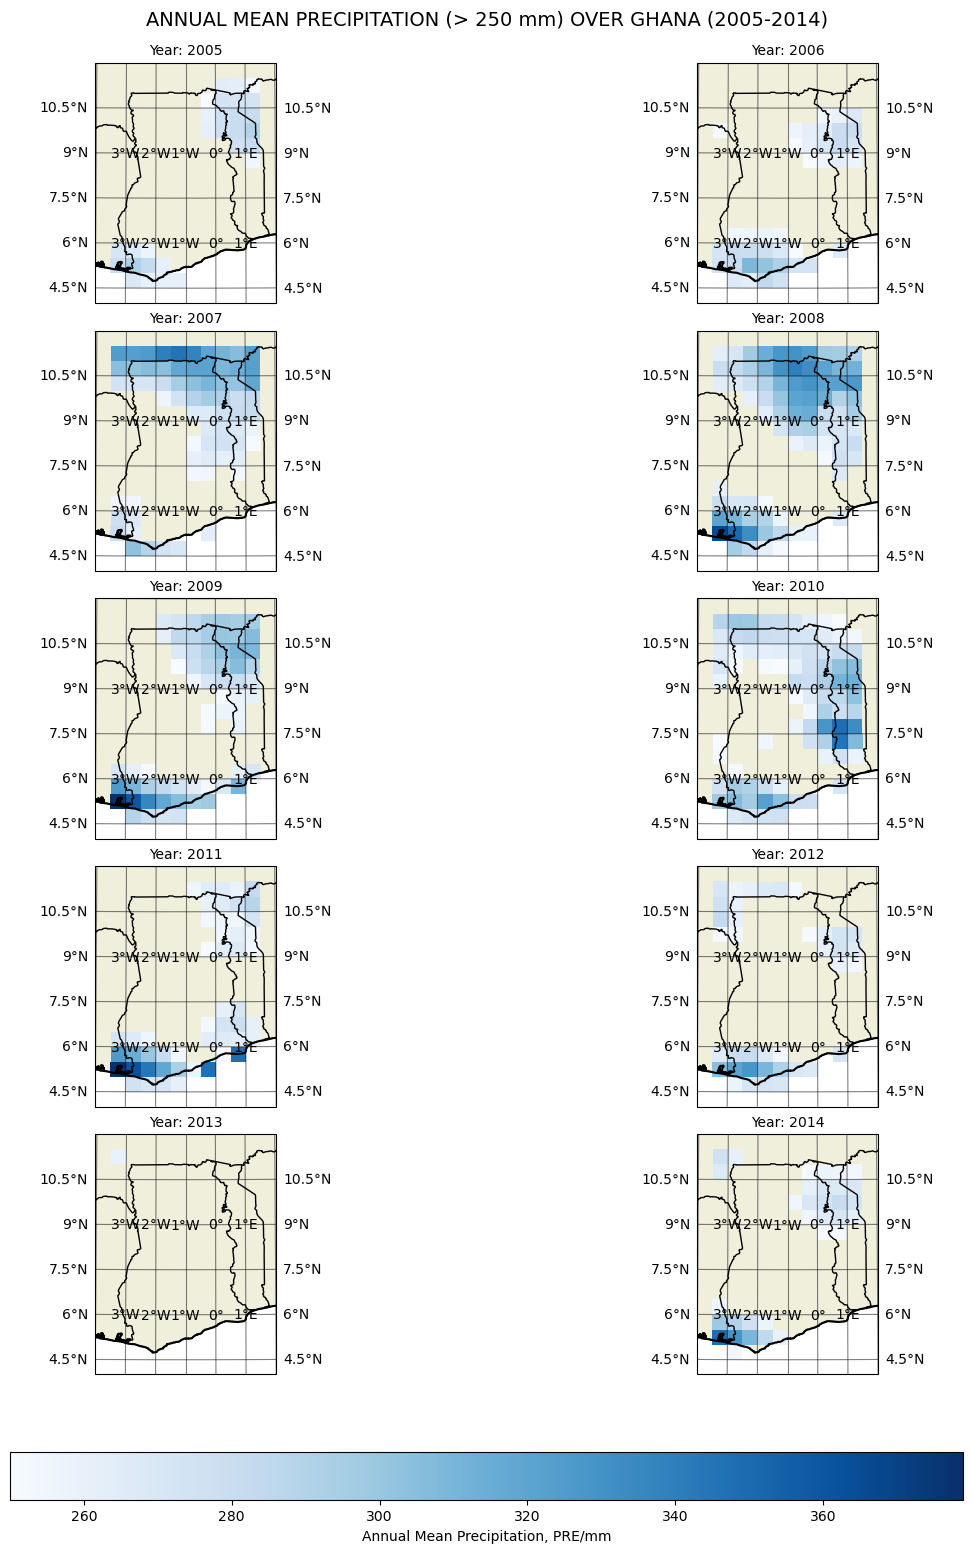

In [10]:
# importing python libraries

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from warnings import filterwarnings

# Ignore warnings
filterwarnings('ignore')

# Loading the NetCDF file, selecting the prefered variable (pre) and assigning it to a variable da


da = xr.open_dataset('Africa_cru_data.nc')['pre']

# Selecting Ghana's regional boundaries and 10 years (2005-2014)
ghana_precip = da.sel(
    lat=slice(4.5, 11.5),  # Ghana's latitudinal range
    lon=slice(-3.5, 1.5),  # Ghana's longitudinal range
    time=slice('2005', '2014')  # 10 years range 
)

# Selecting precipitation values > 250 mm and computing the mean for each year using the groupby
annual_mean_precip = ghana_precip.where(ghana_precip > 250).groupby('time.year').mean(dim='time')

# Setting up the map projection (Lambert Conformal)
projection = ccrs.LambertConformal(
    central_longitude=-1.0,  # Center of Ghana
    central_latitude=8.0,    # Center of Ghana
    standard_parallels=(5.0, 10.0)  # Optimize for Ghana's latitude range
)

# Step 5: Creating a 10-subplot figure (5 rows, 2 columns)
fig, axes = plt.subplots(
    nrows=5, ncols=2, figsize=(12, 15),
    subplot_kw={'projection': projection},
    constrained_layout=True
)

# Flatten axes for easier iteration
axes = axes.flatten()

# Step 6: Plot each year's mean precipitation
years = annual_mean_precip.year.values  # Get the years (2005-2014)
for i, year in enumerate(years):
    ax = axes[i]
    
    # Plot the mean precipitation for the year
    plot = annual_mean_precip.sel(year=year).plot(
        ax=ax,
        transform=ccrs.PlateCarree(),  # Data is in lat/lon coordinates
        cmap='Blues',  # Colormap for precipitation
        vmin=250, vmax=annual_mean_precip.max(),  # Color scale starting at 250 mm
        add_colorbar=False  
    )
    
    # Set title for each subplot
    ax.set_title(f'Year: {year}', fontsize=10)
    
    # Add geographical features
    ax.add_feature(cfeature.COASTLINE, linewidth=1.5)
    ax.add_feature(cfeature.BORDERS, linewidth=1.0)
    ax.add_feature(cfeature.LAND, edgecolor='black')
    
    # Set extent to focus on Ghana
    ax.set_extent([-4, 2, 4, 12], crs=ccrs.PlateCarree())
    
    # Add gridlines
    ax.gridlines(draw_labels=True, linestyle='-', color='black', alpha=0.5)
   
# Step 7: Add a common colorbar
cbar = fig.colorbar(
    plot, ax=axes, orientation='horizontal', pad=0.05,
    label='Annual Mean Precipitation, PRE/mm', shrink=0.8
)

# Step 8: Add a main title
fig.suptitle('ANNUAL MEAN PRECIPITATION (> 250 mm) OVER GHANA (2005-2014)', fontsize=14, y=1.02)

# Step 9: Show the plot
plt.show()